In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from IPython.display import FileLink

In [40]:
#Visual setting
W = 400
imgPath = 'imageSource/chad.jpg'
useImg = True
thickness = 2
line_type = 4   #4,8,16
color = (255, 127, 0) #BGR values

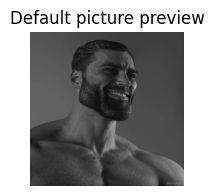

In [41]:
if(useImg):
    image = cv.imread(imgPath)  # Image file
    assert image is not None, "file could not be read, check with os.path.exists()"
else:
    image = np.zeros([W, W, 3], dtype = np.uint8) 
    image[20:200, 40:300] = 255

image = cv.resize(image, (W, W))  # Resize to W x W
#test_image = np.zeros((W, W, 3), dtype=np.uint8)


plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.title('Default picture preview')
plt.axis('off')  # Hide axes
plt.show()

In [42]:
def draw_ellipse(img, major_axis_length, angle):
    img[:]
    

    cv.ellipse(img,
               (W // 2, W // 2),
               (major_axis_length, W // 16),
               angle,  
               0,
               360,
               color,
               thickness,
               line_type)

In [43]:
def drawContoure(img):
    # Convert image to grayscale
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply thresholding
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    #thresh = ( imgray > 0).astype(np.uint8)

    # Check OpenCV version and handle findContours output accordingly
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours on the original image (or a copy of it)
    image_with_contours = img.copy()
    cv.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)
    image_with_contours_rgb = cv.cvtColor(image_with_contours, cv.COLOR_BGR2RGB)
    return image_with_contours_rgb

In [44]:
# Function to display the image using matplotlib
def display_image(image, title):
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [45]:
# Function to update the image when the slider value changes
def update_image(major_axis_length, angle):
    final_image = drawContoure(image)
    draw_ellipse(final_image, major_axis_length, angle)
    display_image(final_image, f"Velikost hlavní osy elypsy {major_axis_length} s úhlem {angle}")

In [46]:
def save_image(b):
    filename = 'output_image.png'
    cv.imwrite(filename, final_image)
    display(FileLink(filename))

# Create a save button
save_button = widgets.Button(description="Save Image")
save_button.on_click(save_image)

In [47]:
slider = widgets.IntSlider(value=W // 4, min=10, max=W // 2, step=1, description='Hlavní osa')
angle_slider = widgets.IntSlider(value=45, min=0, max=180, step=1, description='Úhel')

# Combine the sliders into a single interactive widget
interactive_plot = widgets.interactive(update_image, major_axis_length=slider, angle=angle_slider)


In [48]:
# Display the sliders and the initial plot
display(interactive_plot, save_button)

# Initial display
#update_image(W // 4, 45)

interactive(children=(IntSlider(value=100, description='Hlavní osa', max=200, min=10), IntSlider(value=45, des…

Button(description='Save Image', style=ButtonStyle())